# Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint 

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

# First Dataset

This dataset makes use of 28 x 28 Images


In [2]:
Training_Data_File = "Dataset/utensils_train.csv"
Testing_Data_File = "Dataset/utensils_test.csv"
IMAGE_DIMENSIONS = 28

Training_Data = pd.read_csv(Training_Data_File)
Testing_Data = pd.read_csv(Testing_Data_File)

# Encode Data

Uses the OneHotEncoder to Encode the data on the Training and Testing Dataset

In [3]:
raw_y = Training_Data["Label"].values
y_encoder = OneHotEncoder(sparse=False)
TRAIN_Y = y_encoder.fit_transform(raw_y.reshape(-1, 1))

raw_y_test = Testing_Data["Label"].values
testing_y_encoder = OneHotEncoder(sparse=False)
TEST_Y = testing_y_encoder.fit_transform(raw_y_test.reshape(-1, 1))


# Reshape Data

Reconstructs the images

In [4]:
TRAIN_X = Training_Data.drop("Label", axis=1).values 
TRAIN_X = TRAIN_X.reshape(-1, IMAGE_DIMENSIONS, IMAGE_DIMENSIONS, 1)

TEST_X = Testing_Data.drop("Label", axis=1).values
TEST_X = TEST_X.reshape(-1, IMAGE_DIMENSIONS, IMAGE_DIMENSIONS, 1)

# Build Model

In [5]:
CNN_MODEL = Sequential(
    [   
        InputLayer((IMAGE_DIMENSIONS, IMAGE_DIMENSIONS, 1)),
        Conv2D(256, (5, 5), activation='relu'),
        AveragePooling2D((2, 2)),
        Conv2D(256, (5, 5), activation='relu'),
        Conv2D(256, (5, 5), activation='relu'),
        AveragePooling2D((2, 2)),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(3, activation="softmax")
    ]
)

CNN_MODEL.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit Model

In [6]:
# Uses Model Checkpoint to save the checkpoint of the best validation accuracy
checkpoint_filepath = "tmp/"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Save the training to a variable to access necessary parameters for plotting
history = CNN_MODEL.fit(TRAIN_X, TRAIN_Y, epochs=100, batch_size=64, validation_split=0.2, validation_data=(TEST_X, TEST_Y), callbacks=[model_checkpoint_callback])

Epoch 1/100
10/10 [==============================] - 2s 128ms/step - loss: 4.8061 - accuracy: 0.3736 - val_loss: 1.0882 - val_accuracy: 0.4930
Epoch 2/100
10/10 [==============================] - 1s 58ms/step - loss: 1.0710 - accuracy: 0.4349 - val_loss: 1.0811 - val_accuracy: 0.3944
Epoch 3/100
10/10 [==============================] - 1s 101ms/step - loss: 1.0539 - accuracy: 0.4678 - val_loss: 1.0528 - val_accuracy: 0.5211
Epoch 4/100
10/10 [==============================] - 1s 95ms/step - loss: 1.0141 - accuracy: 0.5212 - val_loss: 0.9552 - val_accuracy: 0.5775
Epoch 5/100
10/10 [==============================] - 1s 67ms/step - loss: 0.9485 - accuracy: 0.5447 - val_loss: 0.9884 - val_accuracy: 0.5352
Epoch 6/100
10/10 [==============================] - 1s 59ms/step - loss: 0.9478 - accuracy: 0.5479 - val_loss: 0.9811 - val_accuracy: 0.5352
Epoch 7/100
10/10 [==============================] - 1s 60ms/step - loss: 0.8942 - accuracy: 0.5856 - val_loss: 0.9108 - val_accuracy: 0.5493
Epoc

# Evaluate Model

In [7]:
# Load Best Model
CNN_MODEL.load_weights(checkpoint_filepath)

# Evaluate the loss and accuracy of the model
test_loss, test_acc = CNN_MODEL.evaluate(TEST_X, TEST_Y)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 10ms/step - loss: 1.6165 - accuracy: 0.7324
Test accuracy: 0.7323943376541138


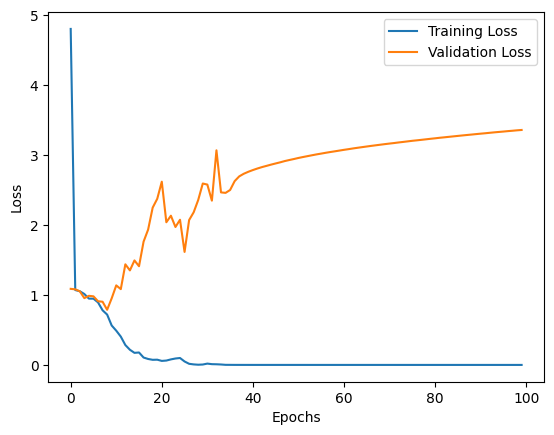

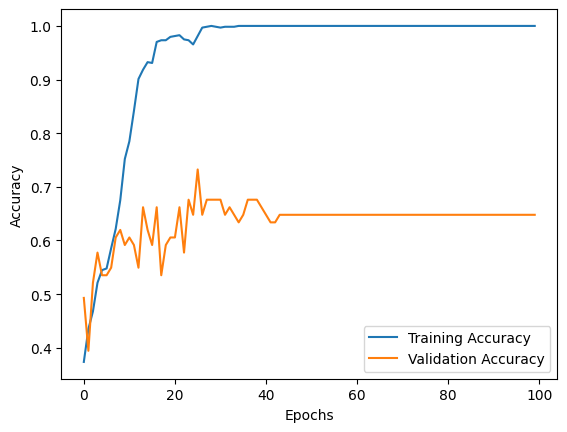

In [8]:
# Plot Accuracy and Loss using Matplotlib
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Show Classification Report
TEST_PREDICTIONS = CNN_MODEL.predict(TEST_X)
PREDICTION_LABELS = np.argmax(TEST_PREDICTIONS, axis=1)
print(classification_report(raw_y_test, PREDICTION_LABELS))

3/3 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.62      0.71      0.67        21
           2       0.76      0.70      0.73        27

    accuracy                           0.73        71
   macro avg       0.73      0.73      0.73        71
weighted avg       0.74      0.73      0.73        71



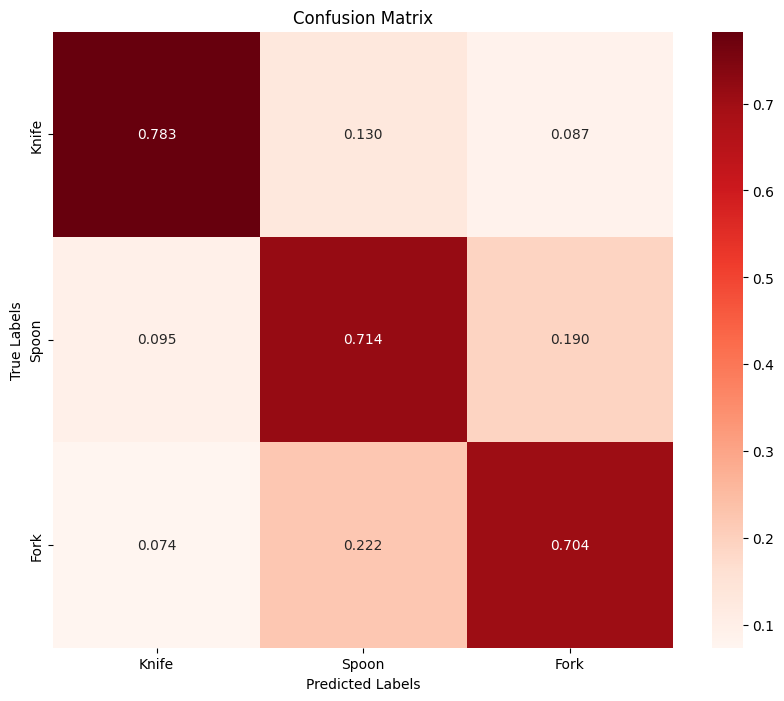

In [10]:

# Get the Label Information
labels = pd.read_csv("Dataset/utensils_labels.csv")
label_strings = labels.Name.tolist()

# Generate Confusion Matrix
cm = confusion_matrix(raw_y_test, PREDICTION_LABELS)
df_cm = pd.DataFrame(cm, index=label_strings, columns=label_strings)
df_cm = df_cm.div(df_cm.sum(axis=1), axis=0)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, cmap='Reds', fmt='.3f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
